<a href="https://colab.research.google.com/github/PederRonning/SOK3022/blob/main/Sok_case1_oppgave2_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sok-3022 Case 1, oppgave 2

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Les inn obligasjonsfilen. CSV-fil
df = pd.read_csv("uten_prices.csv") # csv fra investing.com
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
684,2022-08-16,49.74,49.59,49.74,49.59,6.00K,-0.06%
685,2022-08-15,49.78,49.96,49.96,49.78,3.57K,0.34%
686,2022-08-12,49.61,49.61,49.61,49.61,0.24K,0.44%
687,2022-08-11,49.39,49.39,49.39,49.39,0.03K,-0.88%
688,2022-08-10,49.83,50.14,50.14,49.83,9.66K,0.02%


<ipython-input-15-3864eaa17c1b>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


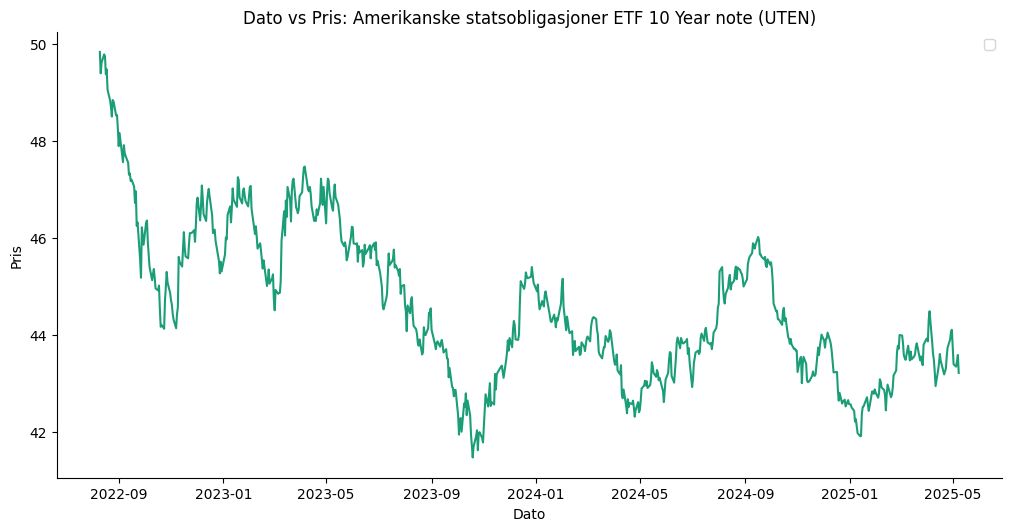

In [15]:
#Date vs Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.legend()
plt.title('Dato vs Pris: Amerikanske statsobligasjoner ETF 10 Year note (UTEN)')
plt.xlabel('Dato')
_ = plt.ylabel('Pris')

In [16]:
# Funksjon
def price_cds_from_bond_price(V0, T, r, recovery_rate, bond_price, P_ref=100, lambda_base=0.005, beta=0.0015):
    dt = 0.01 # tidssteg for numerisk integrasjon
    times = np.arange(0, T, dt) # array med time intervals
    lambda_hazard = lambda_base + beta * (P_ref - bond_price) # λ = λ_base + β · (P_ref − P), Hazard rate
    Q = np.exp(-lambda_hazard * times) # sansynlighet Q(t) = e^(−λt)
    discount = np.exp(-r * times) # diskontering
    premium_leg = np.sum(discount * Q * dt) # premium leg, nåverdi av forventet premium sum
    protection_leg = (1 - recovery_rate) * np.sum(discount * lambda_hazard * Q * dt) # protection leg, nåverdig
    fair_spread = protection_leg / premium_leg # rettferdig pris
    return fair_spread * 1e4  # i basispunkter / spread


In [17]:
# Parametre for CDS
V0 = 10_000_000 # forsikrer 10 000 000 i gjeld eks
T = 5  # løpetid år
r = 0.04  # risikofri rente
recovery_rate = 0.4 # antatt prosent av gjelden

In [18]:
# Beregn CDS-spread for hver dag basert på obligasjonspris
df['CDS_Spread'] = df['Price'].apply(lambda price: price_cds_from_bond_price(
    V0, T, r, recovery_rate, bond_price=price
))

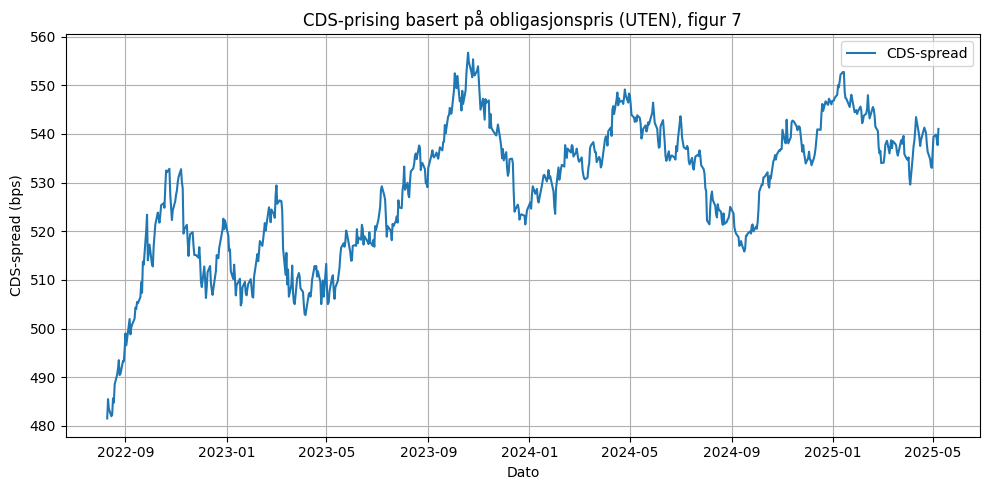

In [19]:
# plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['CDS_Spread'], label='CDS-spread')
plt.xlabel("Dato")
plt.ylabel("CDS-spread (bps)")
plt.title("CDS-prising basert på obligasjonspris (UTEN), figur 7")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

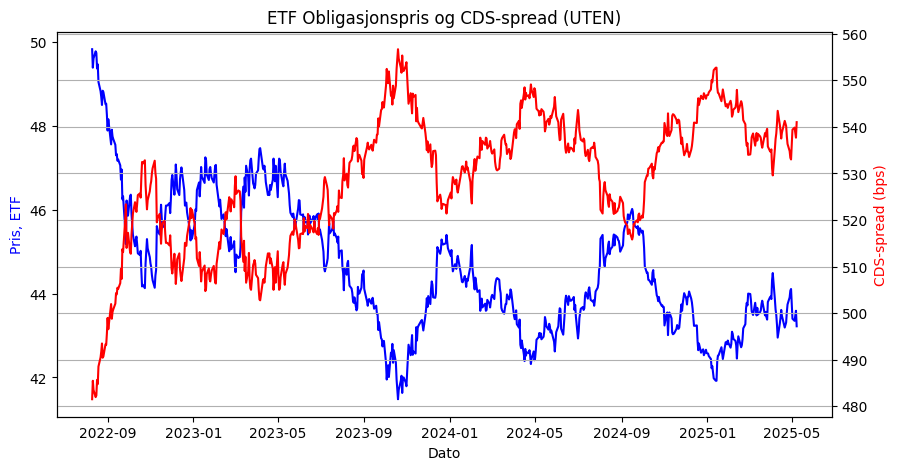

In [20]:
# plot cds spread and UTEN prices in same plot with different y axis

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(df['Date'], df['Price'], 'b-')
ax2.plot(df['Date'], df['CDS_Spread'], 'r-')

ax1.set_xlabel('Dato')
ax1.set_ylabel('Pris, ETF', color='b')
ax2.set_ylabel('CDS-spread (bps)', color='r')

plt.title('ETF Obligasjonspris og CDS-spread (UTEN)')
plt.grid(True)
plt.show()

Kilder:
OpenAI. (2023). ChatGPT (15. mai versjon) [O3]. https://chat.openai.com/